In [1]:
import os
import zipfile
from os import path, getcwd

# local_zip = '/tmp/horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/horse-or-human')
# local_zip = '/tmp/validation-horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/validation-horse-or-human')
# zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join(f'{getcwd()}/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join(f'{getcwd()}/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join(f'{getcwd()}/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join(f'{getcwd()}/validation-horse-or-human/humans')

In [2]:
import tensorflow as tf

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        f'{getcwd()}/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        f'{getcwd()}/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/100
8/8 [==============================] - 46s 6s/step - loss: 0.6956 - accuracy: 0.5417 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 41s 5s/step - loss: 0.6923 - accuracy: 0.5606 - val_loss: 0.6640 - val_accuracy: 0.6211
Epoch 3/100
8/8 [==============================] - 42s 5s/step - loss: 0.6807 - accuracy: 0.6196 - val_loss: 0.6321 - val_accuracy: 0.8242
Epoch 4/100
8/8 [==============================] - 41s 5s/step - loss: 0.6704 - accuracy: 0.6440 - val_loss: 0.5906 - val_accuracy: 0.8555
Epoch 5/100
8/8 [==============================] - 42s 5s/step - loss: 0.6650 - accuracy: 0.6229 - val_loss: 0.5860 - val_accuracy: 0.6875
Epoch 6/100
8/8 [==============================] - 41s 5s/step - loss: 0.6545 - accuracy: 0.6707 - val_loss: 0.5484 - val_accuracy: 0.8164
Epoch 7/100
8/8 [==============================] - 41s 5s/step - loss: 0.618

8/8 [==============================] - 40s 5s/step - loss: 0.2798 - accuracy: 0.8932 - val_loss: 2.6553 - val_accuracy: 0.5664
Epoch 59/100
8/8 [==============================] - 44s 6s/step - loss: 0.2250 - accuracy: 0.8975 - val_loss: 2.3076 - val_accuracy: 0.6172
Epoch 60/100
8/8 [==============================] - 40s 5s/step - loss: 0.1830 - accuracy: 0.9355 - val_loss: 2.2133 - val_accuracy: 0.6172
Epoch 61/100
8/8 [==============================] - 40s 5s/step - loss: 0.3114 - accuracy: 0.8810 - val_loss: 2.1739 - val_accuracy: 0.5625
Epoch 62/100
8/8 [==============================] - 40s 5s/step - loss: 0.2066 - accuracy: 0.9221 - val_loss: 2.8635 - val_accuracy: 0.5469
Epoch 63/100
8/8 [==============================] - 40s 5s/step - loss: 0.2218 - accuracy: 0.9155 - val_loss: 1.9524 - val_accuracy: 0.6328
Epoch 64/100
8/8 [==============================] - 40s 5s/step - loss: 0.1921 - accuracy: 0.9088 - val_loss: 2.6821 - val_accuracy: 0.6016
Epoch 65/100
8/8 [===============

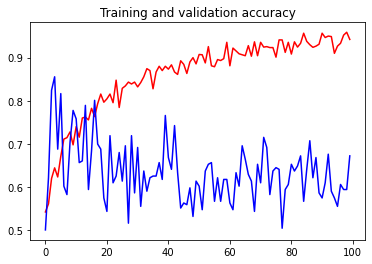

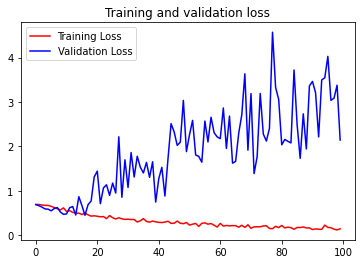

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()